<a href="https://colab.research.google.com/github/susanchen475/mgmt467-analytics-portfolio/blob/main/Lab3_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MGMT 467 — Week 5: Data Visualization & Dashboarding

Instructor: **Prof. Alok R. Chaturvedi**  
Modality: **Guided Inquiry (Tuesday)** + **Hands-on Lab (Thursday)**  
Prepared: 2025-09-23  

---
### Learning Objectives
1. Distinguish **exploratory** vs **explanatory** visualization.  
2. Match common **chart types** to the **questions** they answer.  
3. Design **airline KPIs** and select appropriate visuals.  
4. Use **Gemini** to generate Matplotlib/Seaborn code in Colab.  
5. Build an **interactive dashboard** in Looker Studio using BigQuery/CSV.


## Tuesday (Concepts) — Guided Inquiry

**Instructions:** Answer directly in this notebook. Use short paragraphs and bullet points. When helpful, sketch chart ideas using ASCII or quick scribbles.

### Q1 — Exploratory vs. Explanatory
**Prompt:** *"Explain the difference between exploratory and explanatory visualization."*  
**Hints:** Consider audience, purpose, level of polish, and how much iteration you expect.

📝 **Your response:**

* Exploratory: used for data analysis and discovery. To find insights, test hypothesis, and explore the data. Generally has a low level of polish, it is a quick visualization to rapidly understand the data. It has a high iteration, and many is created until you find the one that has the meaningful insights.
* Explanatory: communicating a specific, pre-defined message. The purpose is to clearly and concisely convey a specific finding or argument to an audience. The audience are usually non-expert audience that needs to make decisions. Visualization are highly polished, carefully designed to guide the audience to make a decision.
-

---
### Q2 — Chart Types & When to Use Them
**Prompt:** *"Describe 5 common chart types (e.g., bar, line, scatter, histogram, map) and the type of data analysis question each is best suited to answer."*  

For each chart, list: **Question archetype**, **Data shape**, **Pitfalls**, **Alternatives**.

📝 **Your response (template):**
1. **Bar:**  
   - Question archetype:  How many?, How much?
   - Data shape:  2types of data: 1 categorical, 1 numerical
   - Pitfalls:  not starting at Y-axis at zero, too much categories, confusing grouped vs. stacked bars, and 3d falls
   - Alternatives:  line chart, dot plot, tree map, and pie chart
2. **Line:**  
  - Question archetype:  trend over time, revealing patterns
   - Data shape:  1 continuous variable on x-axis, 1 or more numerical on y-axis
   - Pitfalls:  Non-sequential X-axis, too much lines, dual Y-axes
   - Alternatives:  area chart, bar chart, slope chart
3. **Scatter:**  
   - Question archetype:  patterns and relationship
   - Data shape:  2 numerical data
   - Pitfalls:  overplotting, Failing to Distinguish Correlation from Causation, Incorrect Data Types
   - Alternatives:  heatmap, line chart, connected scatter plot
4. **Histogram:**  
   - Question archetype:  data distribution. They help you understand how a single numeric dataset is spread out
   - Data shape: 1 continuous numerical variable
   - Pitfalls: too few/ too many bins, Ignoring a zero-value baseline, use for categorical data
   - Alternatives:  density plot, box plot, dot plot
5. **Map:**  
   - Question archetype:  spatial patterns and geographical distribution
   - Data shape: 1 numerical, 1 geographical
   - Pitfalls: misleading by area, ignore population density
   - Alternatives: bar chart, scatter plot, bubble map
---
### Q3 — Airline Executive Dashboard KPIs
**Prompt:** *"Your goal is to create a dashboard for an airline executive. Brainstorm 5 Key Performance Indicators (KPIs) that should be on this dashboard. For each KPI, suggest the best chart type to visualize it."*

Suggested KPI ideas to consider (customize them): On-Time Rate, Average Delay Minutes, Cancellation Rate, Load Factor, Yield (Revenue per Passenger Mile), Completion Factor, Net Promoter Score (if available), Revenue, Cost per Available Seat Mile (CASM).

📝 **Your response (template):**
1. KPI:  On time performance
   - Why it matters:  operational efficiency and customer satisfaction
   - Best chart:  line chart to show the rate over time
   - Drill-down fields:  By airport, by route, by time of day, by flight number.
2. KPI:  load factor
   - Why it matters:  how full the flight is
   - Best chart:  bar chart to compare the different load of different flight
   - Drill-down fields:  By route, by aircraft type, by month, by cabin class.
3. KPI:  Revenue per Available Seat Mile
   - Why it matters:   key measure of an airline's financial performance. It shows how much revenue is generated for each mile flown with a single seat available
   - Best chart: line chart to show if profit is growing or declining over time
   - Drill-down fields: By route, by fare class, by month, by competitor pricing.
4. KPI: Cost per Available Seat Mile
   - Why it matters:  the industry standard for measuring airline costs. It reveals how efficiently the airline operates
   - Best chart:  A stacked bar chart could break down the components
   - Drill-down fields:  By route, by aircraft type, by cost category
5. KPI: Completion Factor
   - Why it matters:  the percentage of scheduled flights that were not canceled. It's a critical measure of operational reliability and customer trust.
   - Best chart: A gauge chart to show the current completion rate against a target
   - Drill-down fields: By airport, by reason for cancellation


---
## Thursday (Practice) — Colab, Gemini, & Looker Studio

You will:
1) Use **Gemini** in Colab to generate visualization code (Matplotlib/Seaborn).  
2) Use a **synthetic airline dataset** (provided below) *or* connect your own BigQuery data.  
3) Build a **Looker Studio** dashboard for your KPIs.

### Option A — Use Gemini Side Panel in Colab
Open the **Gemini** side panel in Colab ("Extensions" or the right sidebar). Ask it to generate Python code given your prompts and the DataFrame you have in memory. Paste/execute the generated code in new cells.

### Option B — Programmatic Gemini (optional)
If you prefer code, you can install the Generative AI SDK and call Gemini with an API key. (We will not store keys in this notebook.)

> **Reminder:** This course emphasizes **AI-assisted coding**—focus on specifying *clear prompts* and then **reviewing and editing** the generated code for correctness, readability, and ethics.


In [ ]:
# (Optional) Environment setup — run if needed
%%capture
!pip install pandas numpy matplotlib seaborn pyarrow db-dtypes google-cloud-bigquery -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
np.random.seed(42)
print('✅ Environment ready')

### Create a Synthetic Airline Dataset (if you don't have one)
Use this dataset to prototype visualizations and dashboards. It contains realistic columns for the KPIs you defined. You can always swap in your BigQuery data later.


In [ ]:
# Generate a synthetic airline dataset
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(467)

dates = pd.date_range(start='2024-01-01', end='2024-06-30', freq='D')
carriers = ['AA', 'DL', 'UA', 'WN', 'AS']
origins = ['ATL','DFW','DEN','ORD','LAX','SEA','SFO','PHX','CLT','MCO']
dests =   ['JFK','LGA','BOS','SFO','LAX','SEA','MIA','IAH','IAD','PHL']

rows = []
for d in dates:
    for carrier in carriers:
        # number of flights per day per carrier
        n = np.random.randint(80, 140)
        for _ in range(n):
            o = np.random.choice(origins)
            de = np.random.choice(dests)
            if o == de:
                continue
            distance = np.random.randint(300, 2800)
            seats = np.random.choice([90,120,150,180,210])
            load_factor = np.clip(np.random.normal(0.82, 0.07), 0.55, 0.98)
            pax = int(seats * load_factor)
            dep_delay = int(np.random.normal(8, 15))
            arr_delay = dep_delay + int(np.random.normal(0, 12))
            dep_delay = max(dep_delay, -5)
            arr_delay = max(arr_delay, -10)
            cancelled = np.random.rand() < 0.025
            diverted = np.random.rand() < 0.005
            revenue = pax * np.random.uniform(120, 420)
            casm = np.random.uniform(0.08, 0.16)  # cost per available seat mile
            cost = casm * seats * distance
            fuel_burn = distance * np.random.uniform(3.0, 4.5)  # gallons per seat-mile proxy
            nps = np.random.normal(35, 15)  # if you want a customer metric proxy
            rows.append({
                'date': d,
                'carrier': carrier,
                'origin': o,
                'dest': de,
                'distance_miles': distance,
                'seats': seats,
                'passengers': pax,
                'dep_delay_min': dep_delay,
                'arr_delay_min': arr_delay,
                'cancelled': int(cancelled),
                'diverted': int(diverted),
                'revenue_usd': round(revenue, 2),
                'cost_usd': round(cost, 2),
                'fuel_burn_gal': round(fuel_burn, 1),
                'nps': round(nps, 1)
            })

df_flights = pd.DataFrame(rows)

# Derived KPIs
df_flights['on_time'] = (df_flights['arr_delay_min'] <= 15).astype(int)
df_flights['load_factor'] = (df_flights['passengers'] / df_flights['seats']).round(3)
df_flights['yield_usd_per_pax_mile'] = (df_flights['revenue_usd'] / (df_flights['passengers'] * df_flights['distance_miles']).clip(lower=1)).round(4)
df_flights['asm'] = df_flights['seats'] * df_flights['distance_miles']  # available seat miles
df_flights['casm'] = (df_flights['cost_usd'] / df_flights['asm']).round(4)
df_flights['month'] = df_flights['date'].dt.to_period('M').astype(str)

df_flights.head()

,date,carrier,origin,dest,distance_miles,seats,passengers,dep_delay_min,arr_delay_min,cancelled,...,revenue_usd,cost_usd,fuel_burn_gal,nps,on_time,load_factor,yield_usd_per_pax_mile,asm,casm,month
0,2024-01-01,AA,LAX,IAH,444,180,160,-5,-10,0,...,26076.49,8301.98,1904.6,53.4,1,0.889,0.3671,79920,0.1039,2024-01
1,2024-01-01,AA,SEA,PHL,601,150,141,10,7,0,...,17561.91,8739.75,2237.5,60.9,1,0.940,0.2072,90150,0.0969,2024-01
2,2024-01-01,AA,LAX,IAD,749,120,100,13,22,0,...,15355.61,12241.65,3076.5,54.1,0,0.833,0.2050,89880,0.1362,2024-01
3,2024-01-01,AA,DFW,BOS,2153,210,169,13,14,0,...,42122.37,65961.23,6642.2,37.0,1,0.805,0.1158,452130,0.1459,2024-01
4,2024-01-01,AA,CLT,SEA,558,90,75,9,-5,0,...,26418.88,7144.23,2142.3,56.3,1,0.833,0.6313,50220,0.1423,2024-01


### Use Gemini to Generate Visualization Code
Copy/paste these **prompts** into Gemini (Colab side panel). After it generates code, paste it into a new cell and run. **Inspect and fix** anything that looks off.

#### Prompt A — On-Time Rate by Carrier (Bar Chart)
```
You are a Python data viz expert. Given a pandas DataFrame `df_flights` with columns including `carrier` and `on_time` (1/0), write Matplotlib/Seaborn code to compute and plot **On-Time Rate by carrier** as a sorted bar chart with percentage labels on bars. Use a clean style, readable labels, and tight layout. Do not use Plotly.
```

#### Prompt B — Average Arrival Delay over Time (Line Chart)
```
Given `df_flights` with `date` (datetime) and `arr_delay_min`, write code to aggregate to daily average arrival delay and plot a **line chart** with a 7-day rolling average overlay. Add axis labels, title, and grid.
```

#### Prompt C — Delay Distribution (Histogram)
```
Given `df_flights` with `arr_delay_min`, write code to plot a **histogram** of arrival delays with appropriate bins, a vertical reference line at 0, and annotate percent of flights within [-5, 15] minutes.
```

#### Prompt D — Load Factor by Route (Top 15) (Horizontal Bar)
```
Given `df_flights` with `origin`, `dest`, and `load_factor`, compute mean load factor by route (origin-dest pair), take the top 15 routes by average load factor, and plot a **horizontal bar chart**. Ensure long labels are readable.
```

#### Prompt E — Cost vs. Revenue with CASM Coloring (Scatter)
```
Given `df_flights` with `cost_usd`, `revenue_usd`, and `casm`, produce a **scatter plot** of cost vs. revenue with points colored by `casm` (continuous colormap) and add a diagonal y=x reference line. Include labels and legend.
```


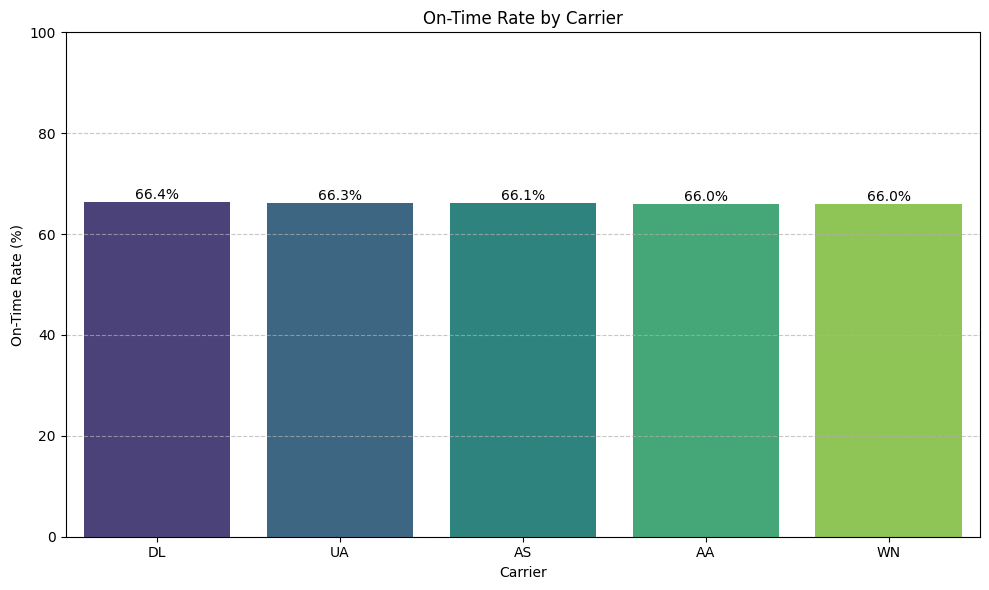

In [ ]:
# Calculate On-Time Rate by Carrier
ontime_by_carrier = df_flights.groupby('carrier')['on_time'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=ontime_by_carrier.index, y=ontime_by_carrier.values * 100, palette='viridis', hue=ontime_by_carrier.index, legend=False)

# Add percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.title('On-Time Rate by Carrier')
plt.xlabel('Carrier')
plt.ylabel('On-Time Rate (%)')
plt.ylim(0, 100) # Ensure y-axis is 0-100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

From the side to side comparison of airlines using bar graph, it shows a very similar on time rate.But DL has a slighly higher rate, with AA and WN having the lowest rate

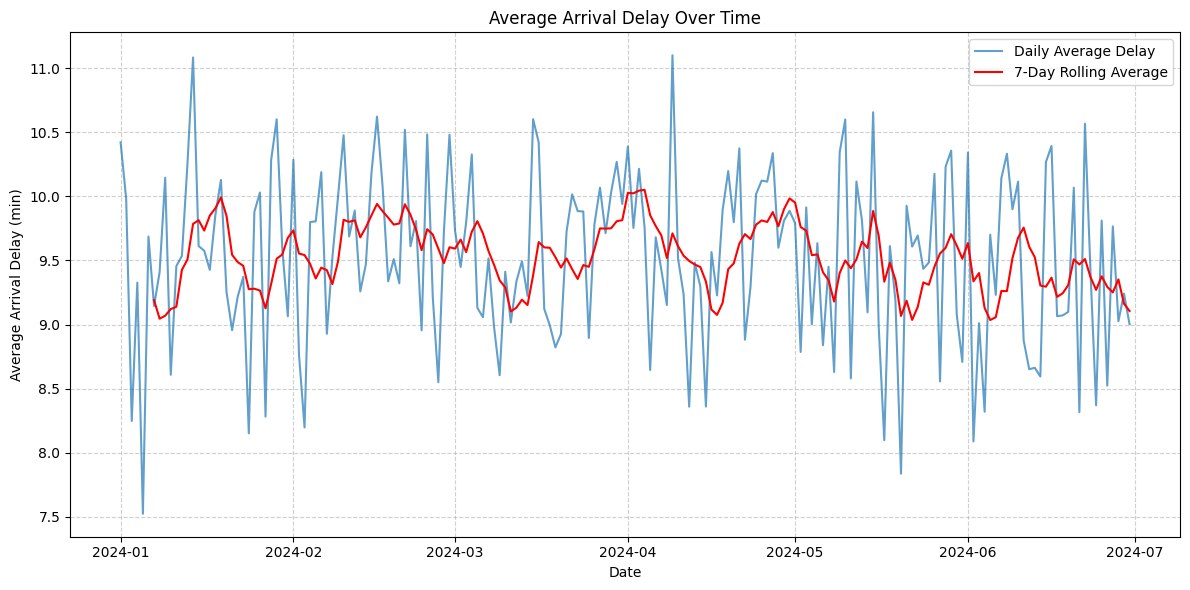

In [ ]:
# Aggregate to daily average arrival delay
daily_avg_delay = df_flights.groupby('date')['arr_delay_min'].mean()

# Calculate 7-day rolling average
rolling_avg_delay = daily_avg_delay.rolling(window=7).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_delay.index, daily_avg_delay.values, label='Daily Average Delay', alpha=0.7)
plt.plot(rolling_avg_delay.index, rolling_avg_delay.values, label='7-Day Rolling Average', color='red')

plt.title('Average Arrival Delay Over Time')
plt.xlabel('Date')
plt.ylabel('Average Arrival Delay (min)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

the daily average delay shows a drastic change of up and downs, but through the 7-day average it is more steady. The average arrival delay in within 9 - 10 minutes.

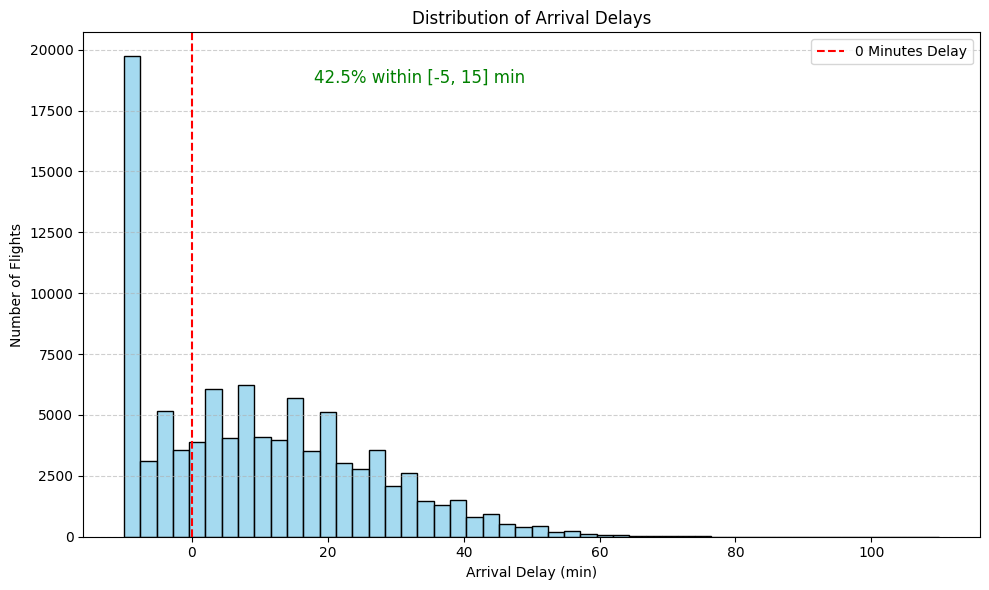

In [ ]:
# Plotting a histogram of arrival delays
plt.figure(figsize=(10, 6))
sns.histplot(df_flights['arr_delay_min'], bins=50, kde=False, color='skyblue')

# Add a vertical reference line at 0
plt.axvline(0, color='red', linestyle='--', label='0 Minutes Delay')

# Calculate the percentage of flights within [-5, 15] minutes
within_range = df_flights[(df_flights['arr_delay_min'] >= -5) & (df_flights['arr_delay_min'] <= 15)]
percentage_within_range = (len(within_range) / len(df_flights)) * 100

# Annotate the percentage on the plot
plt.text(18, plt.ylim()[1] * 0.9, f'{percentage_within_range:.1f}% within [-5, 15] min', color='green', fontsize=12)


plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (min)')
plt.ylabel('Number of Flights')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

From the histogram it shows a right skewed data, where around 20000, arrive early than it expected. It shows that about less than half percent of the flights arrive between the -5 to 15 minutes time range.

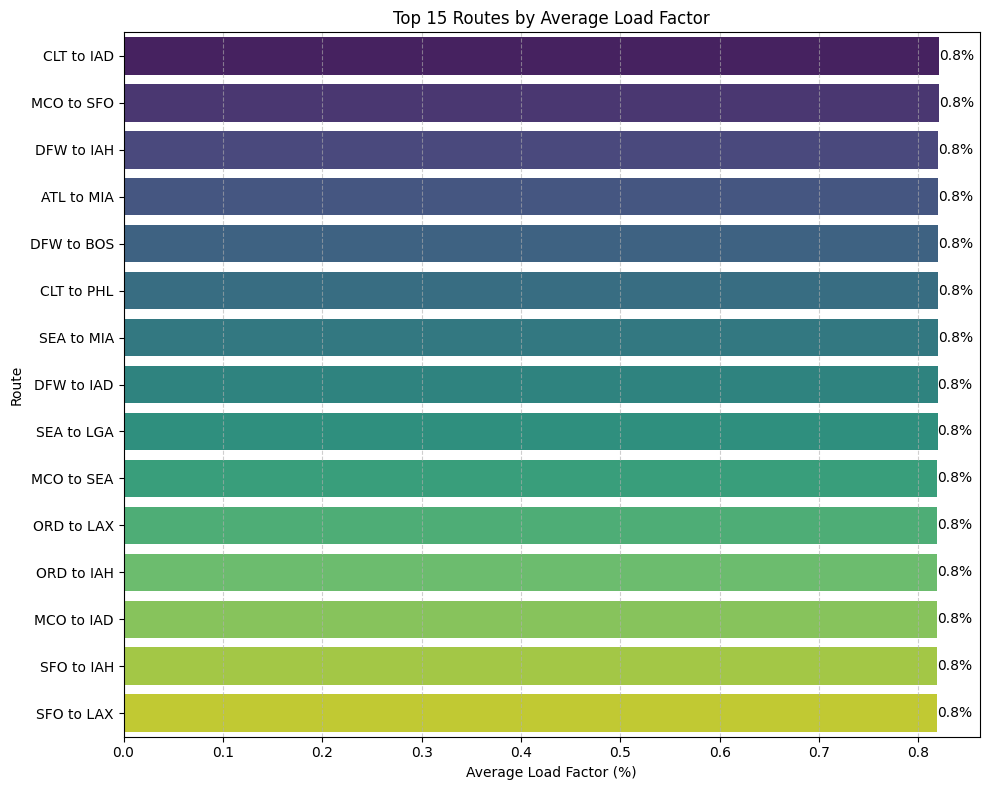

In [ ]:
# Compute mean load factor by route and take the top 15
route_load_factor = df_flights.groupby(['origin', 'dest'])['load_factor'].mean().sort_values(ascending=False).head(15)

# Create route labels
route_labels = [f'{origin} to {dest}' for origin, dest in route_load_factor.index]

# Plotting
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=route_load_factor.values, y=route_labels, palette='viridis', hue=route_labels, legend=False)

# Add percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.title('Top 15 Routes by Average Load Factor')
plt.xlabel('Average Load Factor (%)')
plt.ylabel('Route')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The top 15 shows the exact same load factor of 0.8%, which means that they are very stable

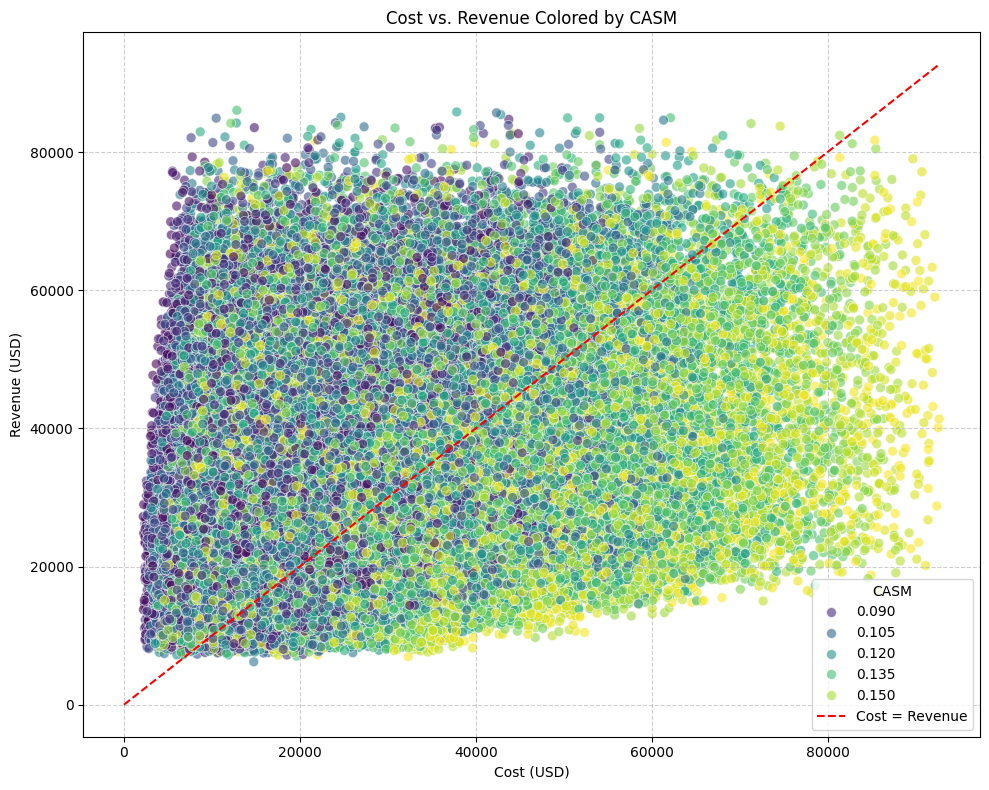

In [ ]:
# Plotting Cost vs. Revenue with CASM coloring
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=df_flights, x='cost_usd', y='revenue_usd', hue='casm', palette='viridis', alpha=0.6, s=50)

# Add a diagonal y=x reference line
x_max = df_flights[['cost_usd', 'revenue_usd']].values.max()
plt.plot([0, x_max], [0, x_max], color='red', linestyle='--', label='Cost = Revenue')

plt.title('Cost vs. Revenue Colored by CASM')
plt.xlabel('Cost (USD)')
plt.ylabel('Revenue (USD)')
plt.legend(title='CASM')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
Since there is too much data, it can look very messy. But we can still tell that the dots above the cost = revenue line are doing better than the ones under it, since it is creating profit.

### (Optional) Bring Your Own BigQuery Data
If you have airline or operations data in BigQuery, you may connect from Colab. Otherwise, skip to the **Export & Looker Studio** section.

**Auth & Client Setup (run in Colab):**
```python
from google.colab import auth
auth.authenticate_user()
print('✅ Authenticated')

from google.cloud import bigquery
client = bigquery.Client(project='YOUR_PROJECT_ID')
```

**Example Query Skeleton:**
```sql
SELECT date, carrier, origin, dest, distance_miles, seats, passengers,
       dep_delay_min, arr_delay_min, cancelled, diverted, revenue_usd, cost_usd
FROM `your_dataset.your_table`
WHERE date BETWEEN '2024-01-01' AND '2024-06-30'
```

Load to pandas:
```python
query = """
-- paste your SQL here
"""
df_bq = client.query(query).to_dataframe()
df_bq.head()
```

Unify columns with the synthetic schema if you want to reuse prompts/plots:
```python
# Example: ensure `on_time`, `load_factor`, and `casm` exist if needed
df_bq['on_time'] = (df_bq['arr_delay_min'] <= 15).astype(int)
df_bq['load_factor'] = (df_bq['passengers'] / df_bq['seats']).round(3)
df_bq['asm'] = df_bq['seats'] * df_bq['distance_miles']
df_bq['casm'] = (df_bq['cost_usd'] / df_bq['asm']).round(4)
```


### Export for Looker Studio
You can **export to CSV** and upload to Looker Studio, or you can **publish to BigQuery** and connect Looker Studio to that table.

#### Option 1 — Export CSV
Run one of the cells below to save a CSV in Colab, then download it or save to Drive.


In [ ]:
# Save synthetic dataset to CSV
df_flights.to_csv('airline_kpis_synthetic.csv', index=False)
print('📁 Saved: airline_kpis_synthetic.csv (download from the file browser on the left)')

#### Option 2 — Write to BigQuery (optional)
If you prefer Looker Studio → BigQuery:

```python
from google.cloud import bigquery
from google.oauth2 import service_account  # or use Colab auth

client = bigquery.Client(project='YOUR_PROJECT_ID')
table_id = 'YOUR_PROJECT_ID.YOUR_DATASET.airline_kpis_synthetic'
job = client.load_table_from_dataframe(df_flights, table_id)
job.result()
print('✅ Loaded to BigQuery:', table_id)
```

**In Looker Studio:**
1. Create → Report → Add data → **BigQuery**.  
2. Select your project/dataset/table.  
3. Add charts for each KPI and configure filters (carrier, route, month).


### Dashboard Wireframe (Design First)
Sketch your intended layout before building it in Looker Studio.

```
+-----------------------------------------------------------+
| Filters: Carrier [AA/DL/UA/WN/AS] | Month [Jan–Jun]       |
+-----------------------------------------------------------+
| KPI Cards: On-Time % | Avg Delay | Cancel % | Load Factor |
+-------------------------------+---------------------------+
| Line: Avg Delay over Time     | Bar: On-Time % by Carrier |
+-------------------------------+---------------------------+
| H-Bar: Top Routes by LF       | Scatter: Cost vs Revenue  |
+-----------------------------------------------------------+
```


## Reflection & Submission

**Short Reflection (3–5 sentences):** What design decision most improved your dashboard’s clarity? What would you change next?

📝 **Your response:**
- From the graphs, it shows that not only the decision to choose graph is important, but also the number of data to be plotted and the color of the plots. When the graph is getting to big, we might miss some hidden patterns and misconclude the results. It is also important to determine the variables that can be used in different graphs, and which is more approiate to get the patterns that we wanted to see.

---
### Checklist
- [ ] Q1–Q3 answered in Tuesday section  
- [ ] 3–5 visualizations generated with **Gemini** in Colab  
- [ ] Synthetic or BigQuery data connected to **Looker Studio**  
- [ ] Dashboard with **filters** and **KPI cards**  
- [ ] Reflection complete  
